# Regressione lineare semplice con scikit-learn
In questo Notebook eseguiremo la nostra prima regressione lineare semplice utilizzando il Boston Housing Dataset per predirre il valore di abitazioni nella zona di Boston.<br>
Cominciamo importando le librerie necessarie.

In [1]:
import pandas as pd
import numpy as np

Importiamo il dataset direttamente dalla repository ufficiale dell'UCI all'interno di un dataset.<br>
Trattandosi di una regressione lineare semplice utilizzeremo soltanto la proprietà collegata al numero di stanze (RM - colonna 5) per predirre il valore medio (MEDV - colonna 13). Le colonne del dataset sono divise da un numero variabile di spazi, in questi casi dobbiamo usare come separatore <span style="font-family: Monaco">\s+</span>.

In [2]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+',
                     usecols=[5,13], names=["RM", "MEDV"])
boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


Creiamo i nostri array numpy per le features X e per il target Y, dopodichè usiamo la funzione <span style="font-family: Monaco">train_test_split</span> di scikit-learn per creare il *train set* e il *test set*.

In [4]:
X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

Adesso che abbiamo i nostri set di dati sotto forma di array numpy possiamo implementare la regressione lineare sul *train set* ed effettuare la predizione sul *test set*

In [5]:
from sklearn.linear_model import LinearRegression

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

Utilizziamo la predizione del modello per calcolare l'errore utilizzando l'errore quadratico medio (MSE - Mean Squared Error).<br>
Esso consiste nella media della somma degli errori al quadrato.
$$MSE = \frac{1}{N}\sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2$$
dove $\hat{Y}$ corrisponde alla predizione del modello.<br>
**NOTA BENE** L'MSE corrisponde alla somma dei quadrati residui (RSS - Residual Sum of Squares) di cui viene calcolato il valore medio.

In [6]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

46.51897859592819

Introduciamo un ulteriore metrica per valutare il nostro modello: **il coefficente di determinazione (R^2)**.<br>
$$ R^2 = 1-\frac{RSS}{SST}$$
dove $RSS$ è la somma dei quadrati residui:
$$RSS = \sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2$$
ed SST è la somma dei quadrati totali:
$$SST = \sum_{i=1}^{N}(Y_i-Y_{mean})^2$$
<br>
in pratica R^2 è una versione standardizzata del MSE che torna un punteggio compreso tra 0 e 1 per il train set, mentre per il test set può assumere anche valori negativi.
**NOTA BENE** R^2 non è una funzione di costo, ma di punteggio, un valore di 1 vuol dire che la predizione del modello è sempre corretta ( cosa improbabile in casi reali ). Quindi tanto più vicino ad 1 è l'R2 tanto migliore è il modello.
    
* **R2_score < 0.3** il modello è inutile.
* **0.3 < R2_score < 0.5** il modello è scarso.     
* **0.5 < R2_score < 0.7** il modello è discreto.
* **0.7 < R2_score < 0.9** il modello è buono.
* **0.9 < R2_score < 1** il modello è ottimo.
* **R2_score = 1** molto probabilmente c'è un errore nel modello.

In [7]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.49673808180577883

Il punteggio non è così male per un modello così semplice, proviamo a visualizzare i coefficenti (bias e peso) che il nostro modello ha imparato disegnando la retta da questi rappresentata in un grafico in 2 dimensioni.

Peso di RM: 9.0076045747527
Bias: -33.9877931623425


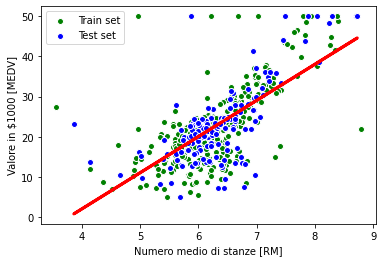

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Peso di RM: "+ str(ll.coef_[0]))
print("Bias: "+str(ll.intercept_))


plt.scatter(X_train, Y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, Y_test, c="blue",  edgecolor='white', label="Test set")

plt.xlabel('Numero medio di stanze [RM]')
plt.ylabel('Valore in $1000 [MEDV]')

plt.legend(loc='upper left')

plt.plot(X_test, Y_pred, color='red', linewidth=3)

La retta approssima i dati abbastanza bene, l'errore alto è dato in gran parte dagli outliers, ovvero dai valori che si distaccano di molto dagli altri.<br>
Per ottenere un modello più preciso, e quindi ridurre l'errore, dobbiamo aggiungere ulteriori features significative.